In [1]:
import pandas as pd
import numpy as np
import gc
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
product_columns = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                  'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                  'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                  'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                  'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                  'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

d_types = {}
for prod in product_columns:
    if (prod != 'ind_nomina_ult1') and (prod != 'ind_nom_pens_ult1'):
        d_types[prod] = np.int8


# Read data
df_train = pd.read_csv('train_ver2.csv', dtype=d_types)

# Fill nan in product features
df_train.ind_nomina_ult1.fillna(0, inplace=True)
df_train.ind_nom_pens_ult1.fillna(0, inplace=True)

# Transform type product features to save memory
for f in product_columns:
    df_train[f] = df_train[f].astype(np.int8)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train.fecha_alta.isnull().sum()

27734

In [4]:
df_train['fecha_dato'] = pd.to_datetime(df_train['fecha_dato'])

In [6]:
df_train['fecha_alta'] = pd.to_datetime(df_train['fecha_alta'])

In [7]:
df_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_train[df_train.ind_nuevo == 1]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
5883,2015-01-28,1044472,N,ES,V,32,2012-08-06,1.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
6579,2015-01-28,1042486,N,ES,H,23,2012-08-03,1.0,4,1.0,...,0,0,0,0,0,0,0,0,0,0
6632,2015-01-28,1042509,N,ES,V,20,2012-08-03,1.0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
6717,2015-01-28,1042950,N,ES,V,30,2012-08-03,1.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
20792,2015-01-28,1023793,N,ES,V,23,2012-07-17,1.0,5,1.0,...,0,0,0,0,0,0,0,0,0,0
26819,2015-01-28,1014660,N,ES,H,32,2012-05-07,1.0,4,1.0,...,0,0,0,0,0,0,0,0,0,0
30944,2015-01-28,1035728,N,ES,H,23,2012-07-30,1.0,0,99.0,...,0,0,0,0,0,0,0,0,0,0
34117,2015-01-28,1040205,N,ES,V,25,2012-08-02,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
46071,2015-01-28,1097831,N,ES,H,34,2012-11-08,1.0,4,1.0,...,0,0,0,0,0,0,0,0,0,0
48109,2015-01-28,1100053,N,ES,V,41,2012-11-13,1.0,4,1.0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
len(df_train)

13647309

In [13]:
gc.collect()
l_ncodpers = []
l_first_date = []
l_first_fecha_alta = []
l_num_unique_fecha_alta = []
l_diff_first_date_first_fecha_alta = []

n_processed = 0

for name,group in df_train[~df_train.fecha_alta.isnull()].groupby('ncodpers'):
    first_date = group.fecha_dato.values[0]
    first_fecha_alta = group.fecha_alta.values[0]
    n_unique_fecha_alta = len(group.fecha_alta.unique())
    #if not np.isnan(first_fecha_alta):
    diff_dates = group.fecha_alta.unique()[0] - group.fecha_dato.values[0]
    days = diff_dates.astype('timedelta64[D]')
    diff_dates = days / np.timedelta64(1, 'D')
    #else:
        #diff_dates = np.nan
    
    l_ncodpers.append(name)
    l_first_date.append(first_date)
    l_first_fecha_alta.append(first_fecha_alta)
    l_num_unique_fecha_alta.append(n_unique_fecha_alta)
    l_diff_first_date_first_fecha_alta.append(diff_dates)
    
    n_processed += 1
    if n_processed % 20000 == 0:
        print(n_processed)

20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
420000
440000
460000
480000
500000
520000
540000
560000
580000
600000
620000
640000
660000
680000
700000
720000
740000
760000
780000
800000
820000
840000
860000
880000
900000
920000
940000


In [14]:

df_dates = pd.DataFrame()
df_dates['l_ncodpers'] = l_ncodpers
df_dates['l_first_date'] = l_first_date
df_dates['l_first_fecha_alta'] = l_first_fecha_alta
df_dates['l_num_unique_fecha_alta'] = l_num_unique_fecha_alta
df_dates['l_diff_first_date_first_fecha_alta'] = l_diff_first_date_first_fecha_alta

df_dates.head()

,l_ncodpers,l_first_date,l_first_fecha_alta,l_num_unique_fecha_alta,l_diff_first_date_first_fecha_alta
0,15889,2015-01-28,1995-01-16,1,-7317.0
1,15890,2015-01-28,1995-01-16,1,-7317.0
2,15891,2015-07-28,2015-07-28,1,0.0
3,15892,2015-01-28,1995-01-16,1,-7317.0
4,15893,2015-01-28,1997-10-03,1,-6326.0


In [15]:
df_dates[df_dates.l_diff_first_date_first_fecha_alta > 0]

,l_ncodpers,l_first_date,l_first_fecha_alta,l_num_unique_fecha_alta,l_diff_first_date_first_fecha_alta
335,16502,2015-09-28,2015-09-30,1,2.0
4529,24763,2016-02-28,2016-02-29,1,1.0
12078,41264,2016-03-28,2016-03-29,1,1.0
15739,48604,2015-01-28,2015-01-29,1,1.0
29533,76291,2016-03-28,2016-03-30,1,2.0
33448,83588,2015-11-28,2015-11-29,1,1.0
34233,85045,2016-05-28,2016-05-31,1,3.0
38795,93862,2016-02-28,2016-02-29,1,1.0
44309,104328,2015-07-28,2015-07-29,1,1.0
51277,117575,2016-02-28,2016-02-29,1,1.0


In [20]:
df_train[df_train.ncodpers == 16502]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
5705044,2015-09-28,16502,N,ES,H,57,2015-09-30,1.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
6909890,2015-10-28,16502,N,ES,H,58,2015-09-30,1.0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
7450803,2015-11-28,16502,N,ES,H,58,2015-09-30,1.0,2,1.0,...,0,0,0,0,0,0,0,0,0,0
8618141,2015-12-28,16502,N,ES,H,58,2015-09-30,1.0,3,1.0,...,0,0,0,0,0,0,0,0,0,0
9401907,2016-01-28,16502,N,ES,H,58,2015-09-30,1.0,4,1.0,...,0,0,0,0,0,0,0,0,0,0
10426398,2016-02-28,16502,N,ES,H,58,2015-09-30,1.0,5,1.0,...,0,0,0,0,0,0,0,0,0,0
11170595,2016-03-28,16502,N,ES,H,58,2015-09-30,1.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
12221089,2016-04-28,16502,N,ES,H,58,2015-09-30,0.0,7,1.0,...,0,0,0,0,0,0,0,0,0,0
13026070,2016-05-28,16502,N,ES,H,58,2015-09-30,0.0,8,1.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_train[df_train.ncodpers == 48604]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
426294,2015-01-28,48604,N,ES,V,52,2015-01-29,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
826973,2015-02-28,48604,N,ES,V,52,2015-01-29,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
1468190,2015-03-28,48604,N,ES,V,52,2015-01-29,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
2082912,2015-04-28,48604,N,ES,V,52,2015-01-29,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
2942982,2015-05-28,48604,N,ES,V,52,2015-01-29,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
3574244,2015-06-28,48604,N,ES,V,52,2015-01-29,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
4064471,2015-07-28,48604,N,ES,V,52,2015-01-29,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
5303845,2015-08-28,48604,N,ES,V,52,2015-01-29,0.0,7,1.0,...,0,0,0,0,0,0,0,0,0,0
5690363,2015-09-28,48604,N,ES,V,52,2015-01-29,0.0,8,1.0,...,0,0,0,0,0,0,0,0,0,0
6924254,2015-10-28,48604,N,ES,V,52,2015-01-29,0.0,9,1.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_dates.l_diff_first_date_first_fecha_alta.max()

3.0

# Junior Account and Age

In [3]:
df_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.age.unique()

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84',
       ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52',
       ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16',
       ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96',
       ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64',
       ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75',
       '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91',
       ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101',
       '106', '103', '  3', '  2', '102', '104', '111', '107', '109',
       '105', '112', '115', '110', '116', '108', '113', 37, 81, 43, 30, 45,
       41, 67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48, 60,
       54

In [5]:
#df_train['age'] = df_train['age'].astype(np.float32)
df_train.age.replace(to_replace=' NA', value=0, inplace=True)

In [6]:
df_train['age'] = df_train['age'].astype(np.float32)

In [7]:
df_train.age.replace(to_replace=0, value=np.nan, inplace=True)

In [8]:
df_train.age.describe()

count    1.361958e+07
mean     4.058895e+01
std      1.692049e+01
min      2.000000e+00
25%      2.400000e+01
50%      3.900000e+01
75%      5.000000e+01
max      1.640000e+02
Name: age, dtype: float64

In [9]:
customers_jun_acc = df_train[df_train.ind_ctju_fin_ult1 == 1].ncodpers.unique()

In [10]:
df_train[df_train.ncodpers.isin(customers_jun_acc)].age.describe()

count    138565.000000
mean         13.562733
std           4.258342
min           2.000000
25%          11.000000
50%          14.000000
75%          17.000000
max          30.000000
Name: age, dtype: float64

In [11]:
print('Mean age all dataset: ' + str(df_train.age.mean()))
print('Median age all dataset: ' + str(df_train.age.median()))
print('Max age all dataset: ' + str(df_train.age.max()))

print('Mean age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(customers_jun_acc)].age.mean()))
print('Median age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(customers_jun_acc)].age.median()))
print('Max age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(customers_jun_acc)].age.max()))

Mean age all dataset: 40.58894729614258
Median age all dataset: 39.0
Max age all dataset: 164.0
Mean age customers who hold/holded junior account: 13.562732696533203
Median age customers who hold/holded junior account: 14.0
Max age customers who hold/holded junior account: 30.0


In [50]:
customers_from_junior_to_current = []
other_customers_with_junior_acc = []
for ncodpers,group in df_train[df_train.ncodpers.isin(customers_jun_acc)].groupby('ncodpers'):
    removals_junior_acc = np.where(group['ind_ctju_fin_ult1'].astype(np.float32).diff().values == -1)[0]
    addings_current_acc = np.where(group['ind_cco_fin_ult1'].astype(np.float32).diff().values == 1)[0]
    if (len(removals_junior_acc) > 0) and (len(addings_current_acc) > 0):
        first_removal = removals_junior_acc[0]
        latest_add = addings_current_acc[-1]
        if first_removal < latest_add:
            customers_from_junior_to_current.append(ncodpers)
    else:
        other_customers_with_junior_acc.append(ncodpers)

In [49]:
len(customers_from_junior_to_current)

327

In [51]:
len(other_customers_with_junior_acc)

8458

In [70]:
print('Mean age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(customers_from_junior_to_current)].age.mean()))
print('Median age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(customers_from_junior_to_current)].age.median()))
print('Max age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(customers_from_junior_to_current)].age.max()))

Mean age customers who hold/holded junior account: 19.874427795410156
Median age customers who hold/holded junior account: 20.0
Max age customers who hold/holded junior account: 23.0


In [71]:
print('Mean age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(other_customers_with_junior_acc)].age.mean()))
print('Median age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(other_customers_with_junior_acc)].age.median()))
print('Max age customers who hold/holded junior account: ' + str(df_train[df_train.ncodpers.isin(other_customers_with_junior_acc)].age.max()))

Mean age customers who hold/holded junior account: 13.24917221069336
Median age customers who hold/holded junior account: 14.0
Max age customers who hold/holded junior account: 30.0


In [81]:
ages_removal_j = []
ages_add_c = []
for ncodpers,group in df_train[df_train.ncodpers.isin(customers_from_junior_to_current)].groupby('ncodpers'):
    removals_junior_acc = np.where(group['ind_ctju_fin_ult1'].astype(np.float32).diff().values == -1)[0]
    addings_current_acc = np.where(group['ind_cco_fin_ult1'].astype(np.float32).diff().values == 1)[0]
    ages_removal_j.append(group.iloc[removals_junior_acc[0]].age)
    ages_add_c.append(group.iloc[addings_current_acc[0]].age)

In [83]:
df_ages_junior2current = pd.DataFrame()
df_ages_junior2current['ages_removal_j'] = ages_removal_j
df_ages_junior2current['ages_add_c'] = ages_add_c

In [95]:
df_ages_junior2current.dtypes

ages_removal_j    float64
ages_add_c        float64
dtype: object

In [97]:
df_ages_junior2current['ages_removal_j'].value_counts()

20.0    317
19.0      5
22.0      1
Name: ages_removal_j, dtype: int64

In [99]:
df_ages_junior2current['ages_add_c'].value_counts()

20.0    319
21.0      5
23.0      1
19.0      1
Name: ages_add_c, dtype: int64

In [112]:
319/326

0.9785276073619632

In [101]:
ages_junior_no_change = []
for ncodpers,group in df_train[df_train.ncodpers.isin(other_customers_with_junior_acc)].groupby('ncodpers'):
    ages_junior_no_change.append(group.iloc[0].age)

In [103]:
df_ages_junior_no_change = pd.DataFrame()
df_ages_junior_no_change['ages_junior_no_change'] = ages_junior_no_change

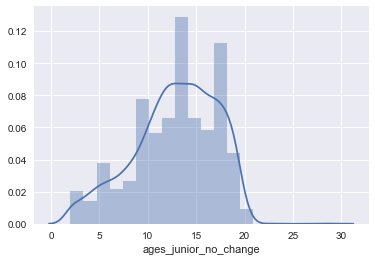

In [119]:
sns.distplot(df_ages_junior_no_change[df_ages_junior_no_change.ages_junior_no_change.notnull()]['ages_junior_no_change'], bins=20);

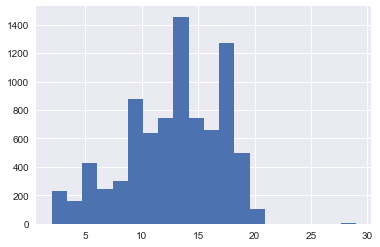

In [113]:
df_ages_junior_no_change['ages_junior_no_change'].hist(bins=20)

In [110]:
df_ages_junior_no_change['ages_junior_no_change'].value_counts()

12.0    744
15.0    741
13.0    730
14.0    726
16.0    662
17.0    662
11.0    635
18.0    612
10.0    507
19.0    498
9.0     369
8.0     304
7.0     245
6.0     223
5.0     207
4.0     160
3.0     120
2.0     109
20.0    102
23.0      2
28.0      2
29.0      1
Name: ages_junior_no_change, dtype: int64

In [111]:
all_ages = []
for ncodpers,group in df_train.groupby('ncodpers'):
    all_ages.append(group.iloc[0].age)

In [115]:
df_ages = pd.DataFrame()
df_ages['all_ages'] = all_ages

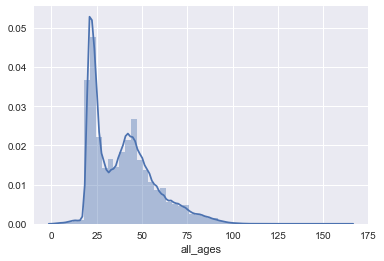

In [116]:
sns.distplot(df_ages[df_ages.all_ages.notnull()]['all_ages']);

In [76]:
group[['fecha_dato', 'age', 'ind_ctju_fin_ult1', 'ind_cco_fin_ult1']]

,fecha_dato,age,ind_ctju_fin_ult1,ind_cco_fin_ult1
390332,2015-01-28,20.0,1,0
866552,2015-02-28,20.0,1,0
1504367,2015-03-28,20.0,1,0
2122202,2015-04-28,20.0,1,0
2902606,2015-05-28,20.0,1,0
3536563,2015-06-28,20.0,1,0
4213002,2015-07-28,20.0,0,0
5354020,2015-08-28,20.0,0,0
5748086,2015-09-28,20.0,0,0
6780482,2015-10-28,20.0,0,1


In [69]:
df_train[df_train.ncodpers == customers_from_junior_to_current[69]][['fecha_dato', 'age', 'ind_ctju_fin_ult1', 'ind_cco_fin_ult1']]

,fecha_dato,age,ind_ctju_fin_ult1,ind_cco_fin_ult1
370280,2015-01-28,20.0,1,0
885373,2015-02-28,20.0,1,0
1528102,2015-03-28,20.0,1,0
2140977,2015-04-28,20.0,1,0
2884156,2015-05-28,20.0,1,0
3516565,2015-06-28,20.0,0,0
4122640,2015-07-28,20.0,0,0
5376663,2015-08-28,20.0,0,0
5772527,2015-09-28,20.0,0,0
6870788,2015-10-28,20.0,0,1


In [17]:
group[['fecha_dato', 'age', 'ind_ctju_fin_ult1', 'ind_cco_fin_ult1']].astype(np.float32).diff()

ValueError: could not convert string to float: '2016-05-28'

In [31]:
df_train[df_train.ncodpers == customers_jun_acc[15]][['ind_ctju_fin_ult1', 'ind_cco_fin_ult1']].astype(np.float32).diff().values

array([[ nan,  nan],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   1.],
       [  0.,   0.],
       [  0.,   0.],
       [ -1.,   0.],
       [  0.,  -1.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       [  0.,   0.]], dtype=float32)

In [22]:
customers_jun_acc

array([1051851, 1051852, 1051853, ..., 1221016, 1139276, 1134061], dtype=int64)

In [39]:
np.where(df_train[df_train.ncodpers == customers_jun_acc[15]]['ind_cco_fin_ult1'].astype(np.float32).diff().values == 1)[0]

array([6], dtype=int64)